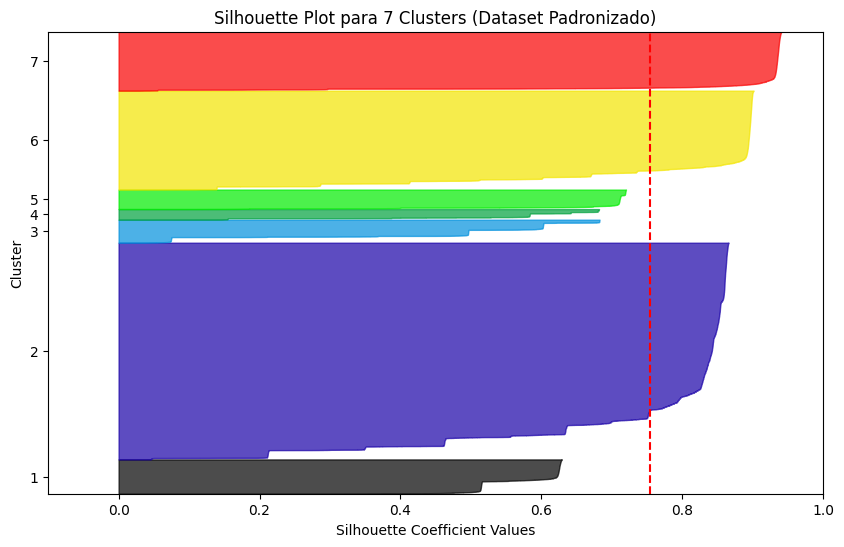

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset padronizado
data_scaled = pd.read_parquet('../data/scaled_ACC_INTAKES_OUTCOMES.parquet')

# Selecionar colunas relevantes para a clusterização
cluster_features = data_scaled.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Definir o número de clusters ideal (usando o valor que você obteve do Método Elbow, por exemplo, 5)
n_clusters = 7

# Criar o modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(data_scaled[cluster_features])

# Calcular o silhouette score para cada ponto
silhouette_vals = silhouette_samples(data_scaled[cluster_features], labels)

# Plotar o Silhouette Plot
fig, ax = plt.subplots(figsize=(10, 6))

y_lower, y_upper = 0, 0
yticks = []

for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()
    y_upper += len(ith_cluster_silhouette_vals)
    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)
    yticks.append((y_lower + y_upper) / 2)
    y_lower = y_upper

ax.axvline(x=silhouette_score(data_scaled[cluster_features], labels), color="red", linestyle="--")

ax.set_title(f'Silhouette Plot para {n_clusters} Clusters (Dataset Padronizado)')
ax.set_xlabel('Silhouette Coefficient Values')
ax.set_ylabel('Cluster')

ax.set_yticks(yticks)
ax.set_yticklabels([str(i) for i in range(1, n_clusters + 1)])

ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(data_scaled[cluster_features])])

plt.show()
